# This jupyter notebook contains the code to set up the simulation sheet for the Mierendoffinsel


In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src\\citygml")

from sheet_generation import create_sheet
from scenario_generation import create_scenario, set_yoc
from gml_alkis import get_block, get_groundsurfes

<Axes: >

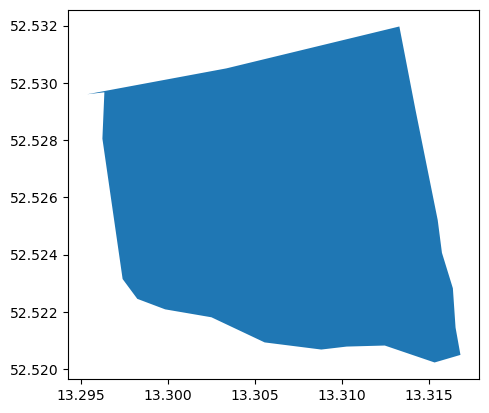

In [2]:
# Set the path to the CityGML files
gml_files = ["LoD2_33_384_5820_1_BE.xml", "LoD2_33_384_5821_1_BE.xml", "LoD2_33_385_5820_1_BE.xml", "LoD2_33_385_5821_1_BE.xml"]

# Load Mierendorff Shape
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
# data is obtained from QGIS, the shapefile is a polygon of the Mierendorff island in Berlin
file_path = r'C:\Users\felix\Programmieren\TECDEM\data\examples\Mierendorff_shape\Mierendorff_shape.shp'
inner_mierendorff = gpd.read_file(file_path)
inner_mierendorff.plot()


In [3]:
# import pandas and geopandas
import pandas as pd
import geopandas as gpd

In [10]:
df_list = []
for gml_file in gml_files: 
    gml_path = os.path.join(module_path, "data", "examples", "gml_data", gml_file)
    df_sheet = create_sheet(gml_path)
    df_list.append(df_sheet)

df = pd.concat(df_list)
df.head()
    

[]
[]
[]
[]


,gml_id,dg_id,address,building_type_gml,year_of_construction,renovation_status,floor_area,height,storeys_above_ground,average_floor_height
0,DEBE3D04YY500004Nu,0,"Germany,Berlin,Charlottenburg-Wilmersdorf,Eosa...",31001_1010,,,211.651373,22.432,NaN,2.8
1,DEBE3D04YY50000R3Q,1,"Germany,Berlin,Charlottenburg-Wilmersdorf,Eosa...",31001_1010,,,218.018530,22.555,NaN,2.8
2,DEBE3D04YY50000BpD,2,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2463,,,14.938902,2.116,NaN,2.8
3,DEBE3D04YY50000Dkg,3,"Germany,Berlin,Charlottenburg-Wilmersdorf,Eosa...",31001_1010,,,279.080422,26.605,NaN,2.8
4,DEBE3D04YY50000NHL,4,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2460,,,66.046755,2.680,NaN,2.8


In [14]:
# Load data for buildings within blocks: 

within_blocks = pd.read_csv(r'C:\Users\felix\Programmieren\TECDEM\data\examples\gml_data\buildings_and_building_parts.csv')
within_blocks.head()

,geometry,coordinates,gml_id,building_part_id,index_right,blknr,bez,bezname,plr,blktypname,ewk,area,datum
0,POLYGON ((190173.32861862011 173162.3613194087...,"[[384976.272, 5820790.551, 32.65], [384977.076...",DEBE3D04YY50000BlO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,819.436562,1994/06/01 00:00:00.000
1,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,NaN,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
2,POLYGON ((190209.72002693682 173191.6674380649...,"[[385014.416, 5820817.572, 32.036], [385016.05...",DEBE3D04YY50000QXO,DEBE3DPcFE8lkbYV,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,173.937359,1994/06/01 00:00:00.000
3,POLYGON ((190229.7310809504 173193.26077722237...,"[[385034.496, 5820817.93, 32.036], [385034.49,...",DEBE3D04YY50000QXO,DEBE3DpnBYcjfpwT,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,30.939735,1994/06/01 00:00:00.000
4,POLYGON ((190219.01940630068 173206.1636086045...,"[[385024.595, 5820831.474, 32.036], [385016.24...",DEBE3D04YY50000QXO,DEBE3DwERcC6Wilv,28,20050,4,Charlottenburg-Wilmersdorf,4300518,Block,100-999 Einwohner,142.857381,1994/06/01 00:00:00.000


In [16]:
relevant_sheet = df[df['gml_id'].isin(within_blocks['gml_id'])]
relevant_sheet

,gml_id,dg_id,address,building_type_gml,year_of_construction,renovation_status,floor_area,height,storeys_above_ground,average_floor_height
5,DEBE3D04YY50000BlO,5,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Mi...",31001_1010,,,820.156039,23.220,NaN,2.8
8,DEBE3D04YY50000Rac,8,"Germany,Berlin,Charlottenburg-Wilmersdorf,/,Ka...",31001_1010,,,724.393123,24.421,NaN,2.8
10,DEBE3D04YY50000DCT,10,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2463,,,23.834601,2.867,NaN,2.8
12,DEBE3D04YY50000Lev,12,"Germany,Berlin,Charlottenburg-Wilmersdorf,Tege...",31001_1010,,,196.167496,22.963,NaN,2.8
14,DEBE3D04YY500002JB,14,"Germany,Berlin,Charlottenburg-Wilmersdorf,Mier...",31001_1010,,,501.798535,24.448,NaN,2.8
...,...,...,...,...,...,...,...,...,...,...
278,DEBE3D04AL2vw0000q,278,"Germany,Berlin,Charlottenburg-Wilmersdorf,Gauß...",31001_2143,,,5631.721669,11.080,NaN,2.8
280,DEBE3D04YY500005p2,280,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2142,,,49.738787,4.553,NaN,2.8
282,DEBE3D04YY50000PWf,282,"Germany,Berlin,Charlottenburg-Wilmersdorf",31001_2120,,,101.638361,12.012,NaN,2.8
293,DEBE3D00YYNv0000Bv,293,"Germany,Berlin,Charlottenburg-Wilmersdorf,Lise...",31001_1130,,,1595.877394,15.498,NaN,2.8


In [ ]:
relevant_sheet.to